## Linear Regression


$$
y = \beta_0 + \beta_1 x + \epsilon
$$

In [2]:
%matplotlib inline
import math
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [3]:
beta='\N{greek small letter beta}'

Create data set

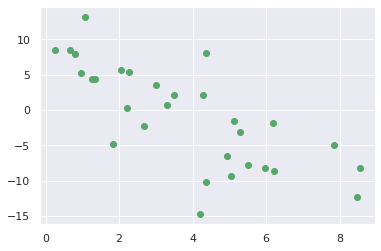

In [4]:
n_sample =30
rng = np.random.RandomState(2)
x = 10 * rng.rand(n_sample)
y = -3 * x + 10 + 5*rng.randn(n_sample)
plt.scatter(x, y, c='g');

In [5]:
y

array([-10.1859332 ,   8.45473707,  -7.83515914,   8.09716217,
       -14.78487195,   0.65358789,   5.71276366,  -1.77995968,
         3.51964582,  -2.22588677,  -8.63396618,  -3.16249997,
         4.39506065,  -1.55228495,  -4.87364924,  -4.9041311 ,
        -8.28086873,  -6.50549181, -12.34014066,   7.85048865,
        -9.30305915,   8.47995596,   2.1581596 ,   5.19860994,
         4.30685373,  -8.27471308,   5.38712163,  13.18352562,
         0.21741726,   2.04719266])

Use Scikit-Learn's LinearRegression for estimationg the regression parameters

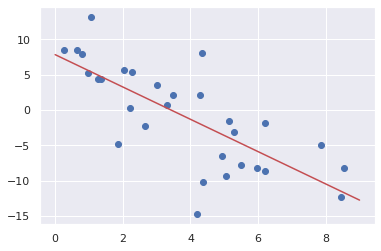

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)
x_min = math.floor(min(x))
x_max = math.ceil(max(x))
xfit = np.linspace(x_min, x_max, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit, c='r');

In [11]:
print(beta+"1"+": ", model.coef_[0])
print(beta+"0"+": ", model.intercept_)

β1:  -2.286599209034518
β0:  7.820438308659005


# p-value computing

In [12]:
import statsmodels.api as sm

model_sm ='NULL'
model_sm = sm.OLS(y,x) # Ordinary Least Square

fii = model_sm.fit()

p_values = fii.summary2().tables[1]['P>|t|']

print(fii.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.236
Model:                            OLS   Adj. R-squared (uncentered):              0.210
Method:                 Least Squares   F-statistic:                              8.957
Date:                Thu, 24 Sep 2020   Prob (F-statistic):                     0.00560
Time:                        02:54:30   Log-Likelihood:                         -97.581
No. Observations:                  30   AIC:                                      197.2
Df Residuals:                      29   BIC:                                      198.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------